<a href="https://colab.research.google.com/github/pratik7191/random-forest-streamlit-app/blob/main/codes_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from csv import QUOTE_MINIMAL

# Load the dataset with error handling
data_path = "/content/Capstone Trade-in Dataset 121124.csv"
try:
    data = pd.read_csv(data_path, quoting=QUOTE_MINIMAL, on_bad_lines='skip')  # Skip problematic lines
    # Print sample and column details
    print("Dataset Columns:", data.columns)
    print("Sample Rows:", data.head())
except Exception as e:
    print("Error reading the file:", e)

In [ ]:
data.shape

(1048575, 27)

In [ ]:
# Convert date/time columns
if 'trade_in_datetime' in data.columns:
    data['trade_in_datetime'] = pd.to_datetime(data['trade_in_datetime'], errors='coerce')

# Ensure numerical columns are in correct type
for col in ['trade_in_price_offered_to_the_customer', 'trade_in_price_offered_to_the_retailer']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Categorical encoding (Example: device_grade)
if 'device_grade' in data.columns:
    data['device_grade_encoded'] = data['device_grade'].astype('category').cat.codes

<ipython-input-3-6099dd56c7ad>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['trade_in_datetime'] = pd.to_datetime(data['trade_in_datetime'], errors='coerce')


In [ ]:
# Drop irrelevant columns
columns_to_drop = ['tradein_ref_id', 'IMEI', 'name_of_firm', 'service_location_name', 'zip_code', 'product_name']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Check the remaining columns
print("Remaining Columns:", data.columns)

Remaining Columns: Index(['trade_in_status', 'trade_in_datetime', 'diagnosis_done',
       'offer_program_name', 'IMEI_upgraded_device',
       'trade_in_price_offered_to_the_customer',
       'trade_in_price_offered_to_the_retailer', 'device_grade',
       'liquidator_type', 'requote_value', 'offer_value', 'new_device_brand',
       'liq_p_flag', 'partner_id', 'product_id', 'psl_id',
       'old_device_brand_id', 'dt_of_purchase', 'is_under_warranty',
       'warranty_till_dt', 'brand_name', 'device_grade_encoded'],
      dtype='object')


In [ ]:
# Fill missing values in numerical columns with mean
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Fill missing values in categorical columns with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Drop columns with more than 80% missing values
threshold = 0.8
data = data.loc[:, data.isnull().mean() < threshold]

<ipython-input-5-ee2a319e6ec3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-5-ee2a319e6ec3>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (or use imputation methods)
data_clean = data.dropna()

# Select numeric columns for clustering
numeric_cols = data_clean.select_dtypes(include=[np.number])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# Convert to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols.columns)
print(scaled_df.head())


trade_in_status                                0
trade_in_datetime                         628869
diagnosis_done                                 0
offer_program_name                             0
IMEI_upgraded_device                           0
trade_in_price_offered_to_the_customer         0
trade_in_price_offered_to_the_retailer         0
device_grade                                   0
liquidator_type                                0
requote_value                                  0
offer_value                                    0
new_device_brand                               0
liq_p_flag                                     0
partner_id                                     0
product_id                                     0
psl_id                                         0
old_device_brand_id                            0
dt_of_purchase                                 0
is_under_warranty                              0
warranty_till_dt                               0
brand_name          

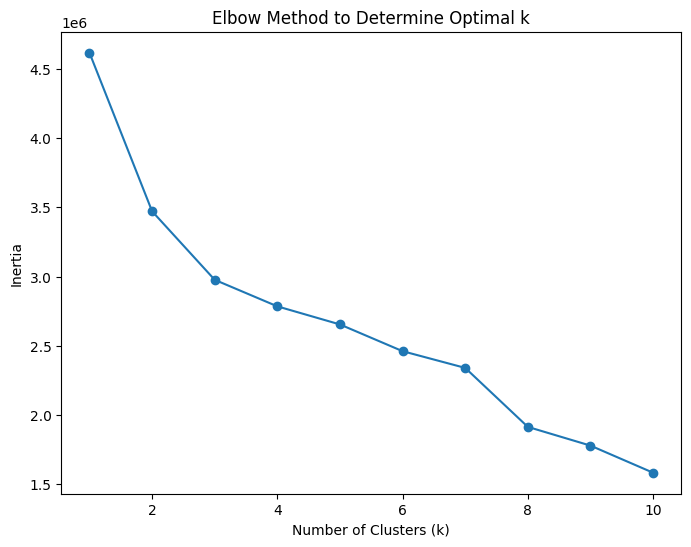

In [ ]:
# Use Elbow Method to determine the optimal K
inertia = []
k_range = range(1, 11)  # Try 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


In [ ]:
# Apply KMeans with the optimal number of clusters
optimal_k = 3  # Change this based on your elbow method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit and predict clusters
clusters = kmeans.fit_predict(scaled_df)

# Add the cluster labels to the original data
data_clean['Cluster'] = clusters
print(data_clean.head())


  trade_in_status   trade_in_datetime  diagnosis_done offer_program_name  \
0          Failed 2024-12-20 21:34:00               1             Xiaomi   
4          Failed 2024-12-20 17:19:00               1             Xiaomi   
5          Failed 2024-12-20 20:19:00               1             Xiaomi   
6          Failed 2024-12-20 20:56:00               1             Xiaomi   
7          Failed 2024-12-20 21:07:00               1             Xiaomi   

  IMEI_upgraded_device  trade_in_price_offered_to_the_customer  \
0          8.64698E+14                                   590.0   
4          8.64698E+14                                  3550.0   
5          8.64698E+14                                     0.0   
6          8.64698E+14                                  2660.0   
7          8.64698E+14                                  3330.0   

   trade_in_price_offered_to_the_retailer device_grade liquidator_type  \
0                                   590.0            E           Local  

<ipython-input-9-9c081438a262>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cluster'] = clusters


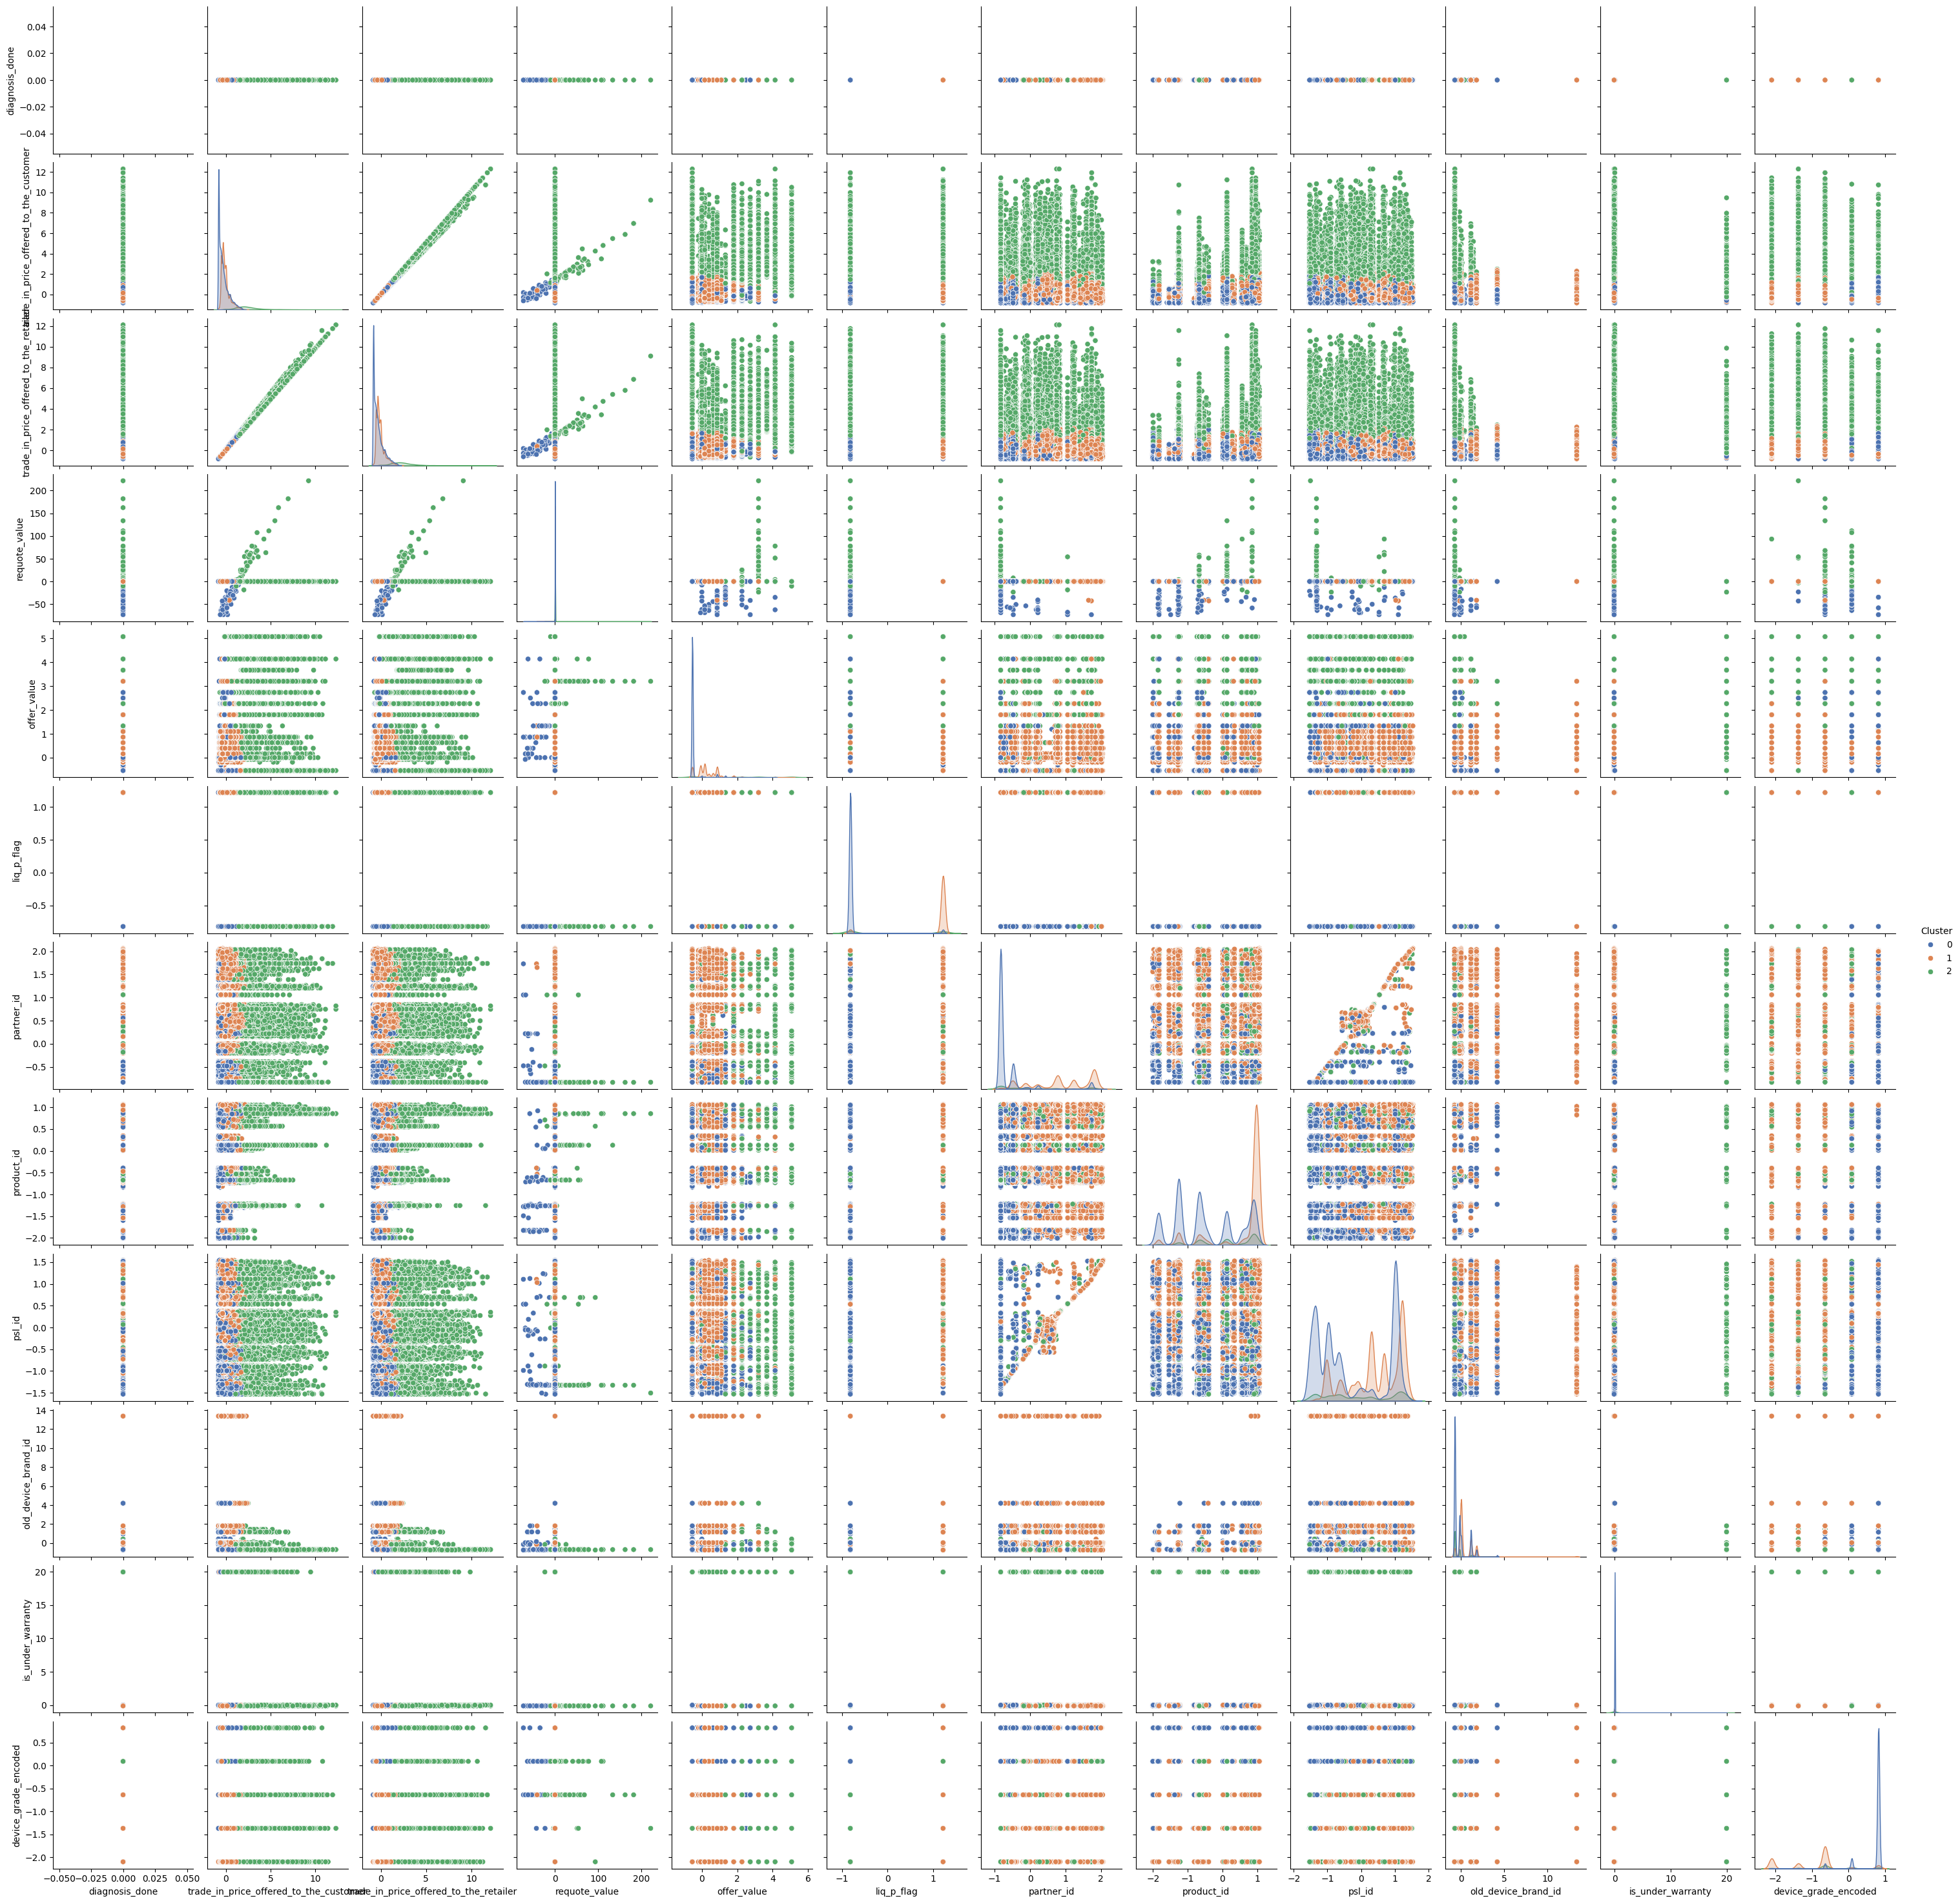

In [ ]:
# Add the cluster column to the scaled data for visualization
scaled_df['Cluster'] = clusters

# Visualize clusters using pair plot
sns.pairplot(scaled_df, hue='Cluster', palette='deep')
plt.show()


In [ ]:
# Select only numeric columns for cluster analysis
numeric_columns = data_clean.select_dtypes(include=[np.number])

# Add the 'Cluster' column back for grouping
numeric_columns['Cluster'] = data_clean['Cluster']

# Calculate cluster means
cluster_means = numeric_columns.groupby('Cluster').mean()

# Display cluster means
print(cluster_means)


         diagnosis_done  trade_in_price_offered_to_the_customer  \
Cluster                                                           
0                   1.0                             4034.316906   
1                   1.0                             5922.847814   
2                   1.0                            26001.876624   

         trade_in_price_offered_to_the_retailer  requote_value  offer_value  \
Cluster                                                                       
0                                   4165.987122   17008.848666   196.892884   
1                                   5925.397092   17011.704984  1762.064904   
2                                  26352.338709   17036.196466  5397.377648   

         liq_p_flag     partner_id    product_id         psl_id  \
Cluster                                                           
0          0.025044   15358.786907  28651.846480  120445.648413   
1          0.940259  120421.956381  47878.567215  185354.266355   


In [ ]:
# Save the clustered data to a new CSV file
data_clean.to_csv('clustered_data.csv', index=False)
print("Clustered data saved to 'clustered_data.csv'.")


Clustered data saved to 'clustered_data.csv'.


<ipython-input-12-3f9998b61556>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['DBSCAN_Cluster'] = dbscan_labels


DBSCAN Cluster Labels: [  -1    0    1 ... 1458 1459 1460]


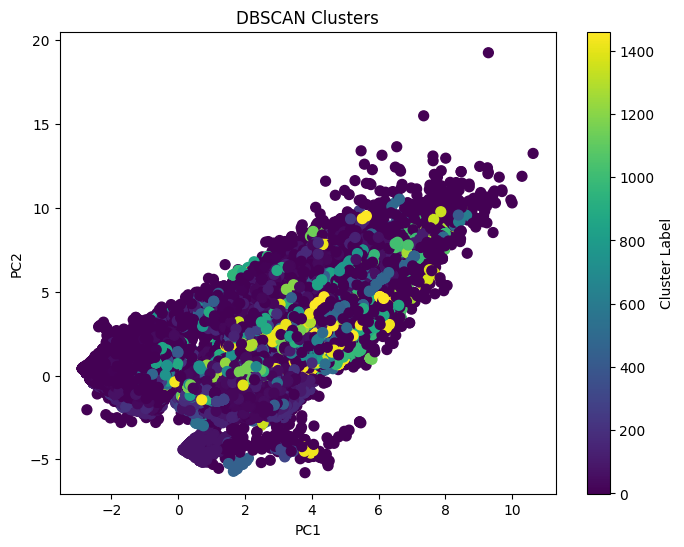

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'data_clean' is your preprocessed DataFrame
# Step 1: Select numeric columns only
numeric_columns = data_clean.select_dtypes(include=[np.number])

# Step 2: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust 'eps' and 'min_samples' for your data
dbscan_labels = dbscan.fit_predict(scaled_data)

# Step 4: Add DBSCAN cluster labels back to the data
data_clean['DBSCAN_Cluster'] = dbscan_labels

# Step 5: Print unique clusters
print("DBSCAN Cluster Labels:", np.unique(dbscan_labels))

# Step 6: Visualize clusters using PCA for 2D projection
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title("DBSCAN Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster Label')
plt.show()


<ipython-input-13-a53ae4c3626b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['GMM_Cluster'] = gmm_labels


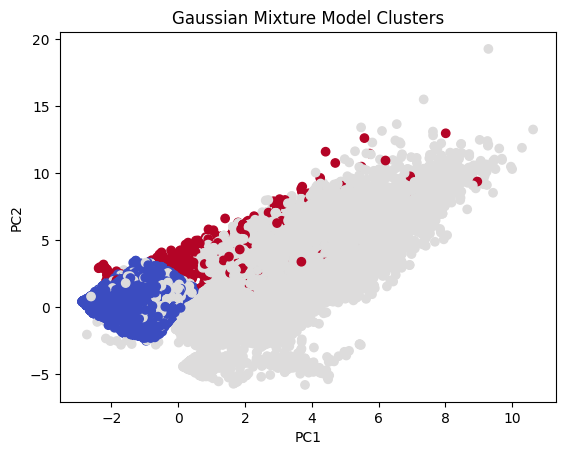

In [ ]:
from sklearn.mixture import GaussianMixture

# Fit GMM
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust 'n_components'
gmm_labels = gmm.fit_predict(scaled_data)

# Add cluster labels
data_clean['GMM_Cluster'] = gmm_labels

# Visualize Clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=gmm_labels, cmap='coolwarm')
plt.title("Gaussian Mixture Model Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
